In [1]:
"""
Created on Fri Mar  8 22:01:14 2019


@author: Koffi Moïse AGBENYA

Inspired by a lab organized by udacity

Here! I create a deep learning model with dense layers in order to classify an
images dataset. The dataset is composed by the MNIST fashion dataset available 
through Tensorflow dataset package.

"""

from __future__ import absolute_import, division, print_function


# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm


C:\Users\DELL\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [3]:
print(tf.__version__)

# This will go away in the future.
# If this gives an error, you might be running TensorFlow 2 or above
# If so, the just comment out this line and run this cell again
tf.enable_eager_execution()

dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))


1.13.1



Number of training examples: 60000
Number of test examples:     10000


In [4]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

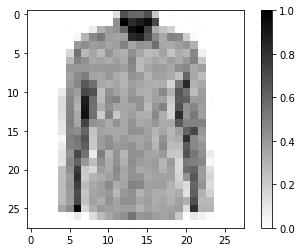

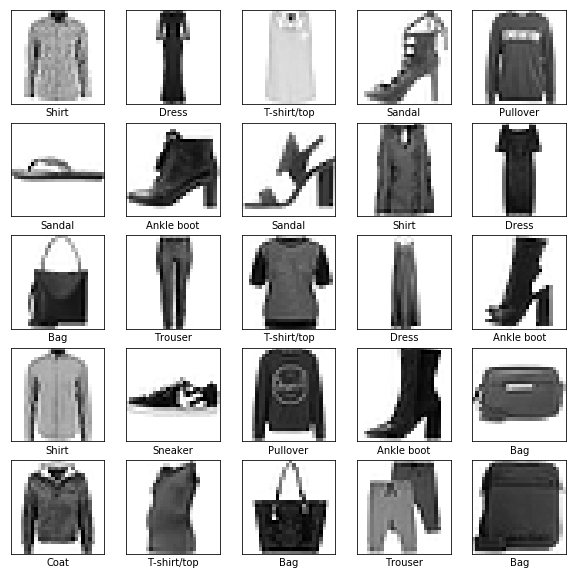

In [5]:
# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()


In [6]:
#Model building
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)), #We flatten the input which is an 28x28px grayscale image
    tf.keras.layers.Dense(128, activation=tf.nn.relu), #One Dense layer of 128 units. At its output with apply the relu activation function 
    tf.keras.layers.Dense(10,  activation=tf.nn.softmax)# One another Dense layer of 10 units. Each unit corresponds to a kind of fashion accessories. We apply at its output the softmax activation function.
])
    
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # We are compiling our model with adam optimizer. The loss function that we choose is sparse categorical cross entropy

BATCH_SIZE = 32 #The processing is doing by batch of size 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))


Epoch 1/5


 775/1875 [===========>..................] - ETA: 10:23:13 - loss: 2.4590 - acc: 0.062 - ETA: 2:04:45 - loss: 2.0837 - acc: 0.243 - ETA: 1:18:02 - loss: 1.9496 - acc: 0.32 - ETA: 52:04 - loss: 1.7983 - acc: 0.4141 - ETA: 39:05 - loss: 1.6879 - acc: 0.45 - ETA: 31:17 - loss: 1.5839 - acc: 0.47 - ETA: 27:14 - loss: 1.5029 - acc: 0.50 - ETA: 24:07 - loss: 1.4503 - acc: 0.52 - ETA: 20:54 - loss: 1.3821 - acc: 0.54 - ETA: 18:27 - loss: 1.3315 - acc: 0.55 - ETA: 16:58 - loss: 1.2989 - acc: 0.56 - ETA: 15:19 - loss: 1.2623 - acc: 0.57 - ETA: 14:18 - loss: 1.2384 - acc: 0.58 - ETA: 13:06 - loss: 1.1994 - acc: 0.59 - ETA: 11:52 - loss: 1.1663 - acc: 0.60 - ETA: 11:15 - loss: 1.1343 - acc: 0.61 - ETA: 10:30 - loss: 1.1089 - acc: 0.62 - ETA: 9:51 - loss: 1.1029 - acc: 0.6240 - ETA: 9:17 - loss: 1.0822 - acc: 0.631 - ETA: 8:46 - loss: 1.0677 - acc: 0.635 - ETA: 8:18 - loss: 1.0542 - acc: 0.642 - ETA: 7:54 - loss: 1.0394 - acc: 0.646 - ETA: 7:31 - loss: 1.0225 - acc: 0.651 - ETA: 7:11 - loss: 1.014

1875/1875 [==============================] - ETA: 8s - loss: 0.5155 - acc: 0.819 - ETA: 7s - loss: 0.5151 - acc: 0.819 - ETA: 7s - loss: 0.5147 - acc: 0.819 - ETA: 7s - loss: 0.5147 - acc: 0.819 - ETA: 7s - loss: 0.5146 - acc: 0.819 - ETA: 7s - loss: 0.5140 - acc: 0.819 - ETA: 7s - loss: 0.5140 - acc: 0.819 - ETA: 7s - loss: 0.5138 - acc: 0.820 - ETA: 7s - loss: 0.5133 - acc: 0.820 - ETA: 7s - loss: 0.5130 - acc: 0.820 - ETA: 6s - loss: 0.5132 - acc: 0.820 - ETA: 6s - loss: 0.5132 - acc: 0.820 - ETA: 6s - loss: 0.5129 - acc: 0.820 - ETA: 6s - loss: 0.5128 - acc: 0.820 - ETA: 6s - loss: 0.5124 - acc: 0.820 - ETA: 6s - loss: 0.5120 - acc: 0.820 - ETA: 6s - loss: 0.5118 - acc: 0.820 - ETA: 6s - loss: 0.5115 - acc: 0.820 - ETA: 6s - loss: 0.5110 - acc: 0.821 - ETA: 6s - loss: 0.5106 - acc: 0.821 - ETA: 5s - loss: 0.5103 - acc: 0.821 - ETA: 5s - loss: 0.5100 - acc: 0.821 - ETA: 5s - loss: 0.5094 - acc: 0.821 - ETA: 5s - loss: 0.5092 - acc: 0.821 - ETA: 5s - loss: 0.5088 - acc: 0.821 - ETA: 

 763/1875 [===========>..................] - ETA: 4:11 - loss: 0.3529 - acc: 0.875 - ETA: 1:26 - loss: 0.2830 - acc: 0.906 - ETA: 55s - loss: 0.3848 - acc: 0.882 - ETA: 45s - loss: 0.4273 - acc: 0.85 - ETA: 40s - loss: 0.3981 - acc: 0.86 - ETA: 36s - loss: 0.3852 - acc: 0.87 - ETA: 35s - loss: 0.3914 - acc: 0.87 - ETA: 35s - loss: 0.3977 - acc: 0.86 - ETA: 34s - loss: 0.4042 - acc: 0.86 - ETA: 33s - loss: 0.3974 - acc: 0.86 - ETA: 33s - loss: 0.3977 - acc: 0.87 - ETA: 31s - loss: 0.3924 - acc: 0.86 - ETA: 32s - loss: 0.3970 - acc: 0.86 - ETA: 31s - loss: 0.3851 - acc: 0.87 - ETA: 30s - loss: 0.3870 - acc: 0.86 - ETA: 30s - loss: 0.3800 - acc: 0.87 - ETA: 30s - loss: 0.3786 - acc: 0.87 - ETA: 30s - loss: 0.3804 - acc: 0.86 - ETA: 30s - loss: 0.3803 - acc: 0.86 - ETA: 30s - loss: 0.3781 - acc: 0.86 - ETA: 29s - loss: 0.3885 - acc: 0.86 - ETA: 29s - loss: 0.3891 - acc: 0.86 - ETA: 29s - loss: 0.3928 - acc: 0.86 - ETA: 29s - loss: 0.3933 - acc: 0.86 - ETA: 28s - loss: 0.3926 - acc: 0.86 - 

1875/1875 [==============================] - ETA: 6s - loss: 0.3881 - acc: 0.861 - ETA: 6s - loss: 0.3878 - acc: 0.861 - ETA: 5s - loss: 0.3879 - acc: 0.861 - ETA: 5s - loss: 0.3884 - acc: 0.861 - ETA: 5s - loss: 0.3882 - acc: 0.861 - ETA: 5s - loss: 0.3881 - acc: 0.861 - ETA: 5s - loss: 0.3881 - acc: 0.861 - ETA: 5s - loss: 0.3883 - acc: 0.861 - ETA: 5s - loss: 0.3883 - acc: 0.861 - ETA: 5s - loss: 0.3880 - acc: 0.861 - ETA: 5s - loss: 0.3877 - acc: 0.861 - ETA: 5s - loss: 0.3878 - acc: 0.861 - ETA: 5s - loss: 0.3879 - acc: 0.861 - ETA: 5s - loss: 0.3877 - acc: 0.861 - ETA: 5s - loss: 0.3876 - acc: 0.861 - ETA: 5s - loss: 0.3875 - acc: 0.861 - ETA: 5s - loss: 0.3874 - acc: 0.861 - ETA: 4s - loss: 0.3874 - acc: 0.861 - ETA: 4s - loss: 0.3874 - acc: 0.861 - ETA: 4s - loss: 0.3874 - acc: 0.861 - ETA: 4s - loss: 0.3873 - acc: 0.861 - ETA: 4s - loss: 0.3871 - acc: 0.861 - ETA: 4s - loss: 0.3871 - acc: 0.861 - ETA: 4s - loss: 0.3871 - acc: 0.861 - ETA: 4s - loss: 0.3870 - acc: 0.861 - ETA: 

 665/1875 [=========>....................] - ETA: 4:05 - loss: 0.4625 - acc: 0.781 - ETA: 1:24 - loss: 0.3928 - acc: 0.843 - ETA: 54s - loss: 0.4108 - acc: 0.851 - ETA: 43s - loss: 0.3592 - acc: 0.86 - ETA: 39s - loss: 0.3503 - acc: 0.87 - ETA: 37s - loss: 0.3811 - acc: 0.86 - ETA: 36s - loss: 0.3789 - acc: 0.86 - ETA: 36s - loss: 0.3708 - acc: 0.87 - ETA: 34s - loss: 0.3700 - acc: 0.86 - ETA: 33s - loss: 0.3707 - acc: 0.87 - ETA: 33s - loss: 0.3650 - acc: 0.87 - ETA: 33s - loss: 0.3697 - acc: 0.86 - ETA: 32s - loss: 0.3697 - acc: 0.86 - ETA: 32s - loss: 0.3761 - acc: 0.86 - ETA: 31s - loss: 0.3742 - acc: 0.86 - ETA: 31s - loss: 0.3862 - acc: 0.86 - ETA: 30s - loss: 0.3834 - acc: 0.86 - ETA: 30s - loss: 0.3831 - acc: 0.86 - ETA: 29s - loss: 0.3815 - acc: 0.86 - ETA: 29s - loss: 0.3750 - acc: 0.86 - ETA: 29s - loss: 0.3718 - acc: 0.86 - ETA: 29s - loss: 0.3700 - acc: 0.86 - ETA: 29s - loss: 0.3720 - acc: 0.86 - ETA: 28s - loss: 0.3683 - acc: 0.86 - ETA: 28s - loss: 0.3649 - acc: 0.86 - 

1875/1875 [==============================] - ETA: 7s - loss: 0.3378 - acc: 0.876 - ETA: 7s - loss: 0.3377 - acc: 0.876 - ETA: 7s - loss: 0.3376 - acc: 0.876 - ETA: 7s - loss: 0.3375 - acc: 0.876 - ETA: 7s - loss: 0.3374 - acc: 0.876 - ETA: 7s - loss: 0.3375 - acc: 0.876 - ETA: 7s - loss: 0.3375 - acc: 0.876 - ETA: 7s - loss: 0.3376 - acc: 0.876 - ETA: 7s - loss: 0.3376 - acc: 0.876 - ETA: 7s - loss: 0.3376 - acc: 0.876 - ETA: 7s - loss: 0.3375 - acc: 0.876 - ETA: 7s - loss: 0.3377 - acc: 0.876 - ETA: 7s - loss: 0.3375 - acc: 0.876 - ETA: 6s - loss: 0.3375 - acc: 0.876 - ETA: 6s - loss: 0.3375 - acc: 0.876 - ETA: 6s - loss: 0.3374 - acc: 0.876 - ETA: 6s - loss: 0.3374 - acc: 0.876 - ETA: 6s - loss: 0.3374 - acc: 0.876 - ETA: 6s - loss: 0.3376 - acc: 0.876 - ETA: 6s - loss: 0.3376 - acc: 0.876 - ETA: 6s - loss: 0.3375 - acc: 0.876 - ETA: 6s - loss: 0.3373 - acc: 0.876 - ETA: 6s - loss: 0.3372 - acc: 0.876 - ETA: 6s - loss: 0.3372 - acc: 0.876 - ETA: 6s - loss: 0.3371 - acc: 0.876 - ETA: 

 773/1875 [===========>..................] - ETA: 3:52 - loss: 0.1911 - acc: 0.937 - ETA: 1:07 - loss: 0.2831 - acc: 0.900 - ETA: 56s - loss: 0.3291 - acc: 0.878 - ETA: 45s - loss: 0.3458 - acc: 0.88 - ETA: 40s - loss: 0.3338 - acc: 0.87 - ETA: 38s - loss: 0.3475 - acc: 0.87 - ETA: 38s - loss: 0.3501 - acc: 0.86 - ETA: 37s - loss: 0.3604 - acc: 0.86 - ETA: 34s - loss: 0.3614 - acc: 0.86 - ETA: 33s - loss: 0.3566 - acc: 0.87 - ETA: 33s - loss: 0.3417 - acc: 0.87 - ETA: 31s - loss: 0.3337 - acc: 0.87 - ETA: 31s - loss: 0.3297 - acc: 0.88 - ETA: 30s - loss: 0.3243 - acc: 0.88 - ETA: 30s - loss: 0.3276 - acc: 0.88 - ETA: 29s - loss: 0.3276 - acc: 0.88 - ETA: 29s - loss: 0.3285 - acc: 0.88 - ETA: 29s - loss: 0.3312 - acc: 0.88 - ETA: 28s - loss: 0.3353 - acc: 0.88 - ETA: 28s - loss: 0.3372 - acc: 0.87 - ETA: 28s - loss: 0.3353 - acc: 0.88 - ETA: 28s - loss: 0.3379 - acc: 0.88 - ETA: 27s - loss: 0.3383 - acc: 0.88 - ETA: 27s - loss: 0.3405 - acc: 0.87 - ETA: 27s - loss: 0.3409 - acc: 0.87 - 

1875/1875 [==============================] - ETA: 4s - loss: 0.3204 - acc: 0.881 - ETA: 4s - loss: 0.3205 - acc: 0.881 - ETA: 4s - loss: 0.3204 - acc: 0.881 - ETA: 4s - loss: 0.3203 - acc: 0.881 - ETA: 4s - loss: 0.3203 - acc: 0.882 - ETA: 4s - loss: 0.3202 - acc: 0.882 - ETA: 4s - loss: 0.3201 - acc: 0.882 - ETA: 4s - loss: 0.3199 - acc: 0.882 - ETA: 3s - loss: 0.3198 - acc: 0.882 - ETA: 3s - loss: 0.3196 - acc: 0.882 - ETA: 3s - loss: 0.3195 - acc: 0.882 - ETA: 3s - loss: 0.3195 - acc: 0.882 - ETA: 3s - loss: 0.3198 - acc: 0.882 - ETA: 3s - loss: 0.3197 - acc: 0.882 - ETA: 3s - loss: 0.3198 - acc: 0.882 - ETA: 3s - loss: 0.3201 - acc: 0.882 - ETA: 3s - loss: 0.3202 - acc: 0.882 - ETA: 3s - loss: 0.3202 - acc: 0.882 - ETA: 3s - loss: 0.3204 - acc: 0.882 - ETA: 3s - loss: 0.3207 - acc: 0.882 - ETA: 3s - loss: 0.3206 - acc: 0.881 - ETA: 3s - loss: 0.3204 - acc: 0.882 - ETA: 3s - loss: 0.3202 - acc: 0.882 - ETA: 3s - loss: 0.3202 - acc: 0.882 - ETA: 2s - loss: 0.3202 - acc: 0.882 - ETA: 

 843/1875 [============>.................] - ETA: 3:54 - loss: 0.1695 - acc: 0.875 - ETA: 1:22 - loss: 0.2791 - acc: 0.890 - ETA: 1:11 - loss: 0.2587 - acc: 0.901 - ETA: 59s - loss: 0.2598 - acc: 0.902 - ETA: 49s - loss: 0.2509 - acc: 0.90 - ETA: 43s - loss: 0.2617 - acc: 0.90 - ETA: 39s - loss: 0.2700 - acc: 0.90 - ETA: 37s - loss: 0.2698 - acc: 0.90 - ETA: 36s - loss: 0.2793 - acc: 0.90 - ETA: 34s - loss: 0.2767 - acc: 0.90 - ETA: 33s - loss: 0.2833 - acc: 0.90 - ETA: 32s - loss: 0.2812 - acc: 0.90 - ETA: 31s - loss: 0.2887 - acc: 0.89 - ETA: 31s - loss: 0.2938 - acc: 0.89 - ETA: 30s - loss: 0.2948 - acc: 0.89 - ETA: 30s - loss: 0.2908 - acc: 0.89 - ETA: 29s - loss: 0.2933 - acc: 0.89 - ETA: 29s - loss: 0.2910 - acc: 0.89 - ETA: 29s - loss: 0.2992 - acc: 0.89 - ETA: 28s - loss: 0.2993 - acc: 0.89 - ETA: 28s - loss: 0.3011 - acc: 0.89 - ETA: 28s - loss: 0.2994 - acc: 0.89 - ETA: 28s - loss: 0.3028 - acc: 0.89 - ETA: 28s - loss: 0.3044 - acc: 0.89 - ETA: 28s - loss: 0.3101 - acc: 0.89 

1875/1875 [==============================] - ETA: 2s - loss: 0.2929 - acc: 0.892 - ETA: 2s - loss: 0.2927 - acc: 0.892 - ETA: 2s - loss: 0.2928 - acc: 0.892 - ETA: 2s - loss: 0.2927 - acc: 0.892 - ETA: 2s - loss: 0.2926 - acc: 0.892 - ETA: 2s - loss: 0.2925 - acc: 0.892 - ETA: 2s - loss: 0.2926 - acc: 0.892 - ETA: 2s - loss: 0.2924 - acc: 0.892 - ETA: 2s - loss: 0.2927 - acc: 0.892 - ETA: 2s - loss: 0.2925 - acc: 0.892 - ETA: 2s - loss: 0.2932 - acc: 0.892 - ETA: 2s - loss: 0.2930 - acc: 0.892 - ETA: 2s - loss: 0.2932 - acc: 0.892 - ETA: 2s - loss: 0.2935 - acc: 0.892 - ETA: 2s - loss: 0.2934 - acc: 0.892 - ETA: 1s - loss: 0.2934 - acc: 0.892 - ETA: 1s - loss: 0.2933 - acc: 0.892 - ETA: 1s - loss: 0.2934 - acc: 0.892 - ETA: 1s - loss: 0.2934 - acc: 0.892 - ETA: 1s - loss: 0.2934 - acc: 0.892 - ETA: 1s - loss: 0.2936 - acc: 0.892 - ETA: 1s - loss: 0.2937 - acc: 0.892 - ETA: 1s - loss: 0.2936 - acc: 0.892 - ETA: 1s - loss: 0.2937 - acc: 0.892 - ETA: 1s - loss: 0.2937 - acc: 0.892 - ETA: 

In [7]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - ETA: 1:31 - loss: 0.2946 - acc: 0.906 - ETA: 26s - loss: 0.2390 - acc: 0.906 - ETA: 15s - loss: 0.2713 - acc: 0.89 - ETA: 11s - loss: 0.3216 - acc: 0.87 - ETA: 9s - loss: 0.2929 - acc: 0.8887 - ETA: 7s - loss: 0.3079 - acc: 0.881 - ETA: 7s - loss: 0.3213 - acc: 0.872 - ETA: 6s - loss: 0.3425 - acc: 0.865 - ETA: 6s - loss: 0.3540 - acc: 0.858 - ETA: 5s - loss: 0.3366 - acc: 0.868 - ETA: 5s - loss: 0.3414 - acc: 0.870 - ETA: 5s - loss: 0.3377 - acc: 0.872 - ETA: 5s - loss: 0.3473 - acc: 0.870 - ETA: 4s - loss: 0.3580 - acc: 0.867 - ETA: 4s - loss: 0.3528 - acc: 0.870 - ETA: 4s - loss: 0.3523 - acc: 0.873 - ETA: 4s - loss: 0.3462 - acc: 0.876 - ETA: 4s - loss: 0.3464 - acc: 0.877 - ETA: 4s - loss: 0.3423 - acc: 0.878 - ETA: 4s - loss: 0.3395 - acc: 0.878 - ETA: 3s - loss: 0.3384 - acc: 0.878 - ETA: 3s - loss: 0.3361 - acc: 0.878 - ETA: 3s - loss: 0.3376 - acc: 0.878 - ETA: 3s - loss: 0.3366 - acc: 0.879 - ETA: 3s - loss: 0.3410 - acc: 0.878 - ETA

In [8]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

predictions.shape

#first prediction
predictions[0]

#We can see which label has the highest confidence value:
np.argmax(predictions[0])

6

In [9]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

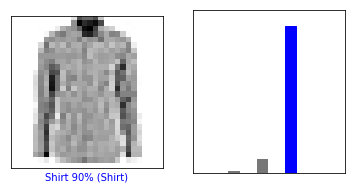

In [10]:
#Let's look at the 0th image, predictions, and prediction array.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
#Shirt with 90%

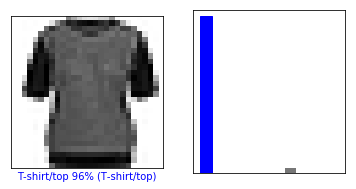

In [11]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
#T-shirt/top 96%

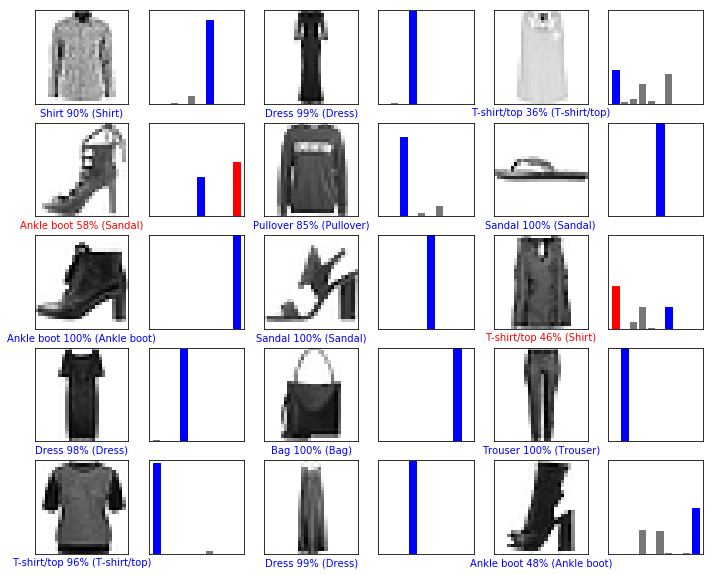

In [12]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

"""
After this experiment I am trying the same dataset with convolutionnal neural network which theoretically
must have a better accuracy than the dense (DCL) network
"""